## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# The `solutions_multivariate.py` is a Python file available in the Notebook server that contains solution to the TO DO tasks.
# The solution to each task is present in a separate function in the `solutions_univ.py` file. 
# Do not refer to the file untill you attempt to write code yourself. 
from solutions_multivariate import *

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## About the Dataset
In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [2]:
df = pd.read_csv('../Data/fuel-econ.csv')
df.shape

(3929, 20)

In [3]:
df.head(4)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5


### Exercise 1: Advanced Faceting
Use a FacetGrid to plot the city (`city`) vs. highway (`highway`) fuel efficiencies (both in mpg) for each vehicle class (`VClass`). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

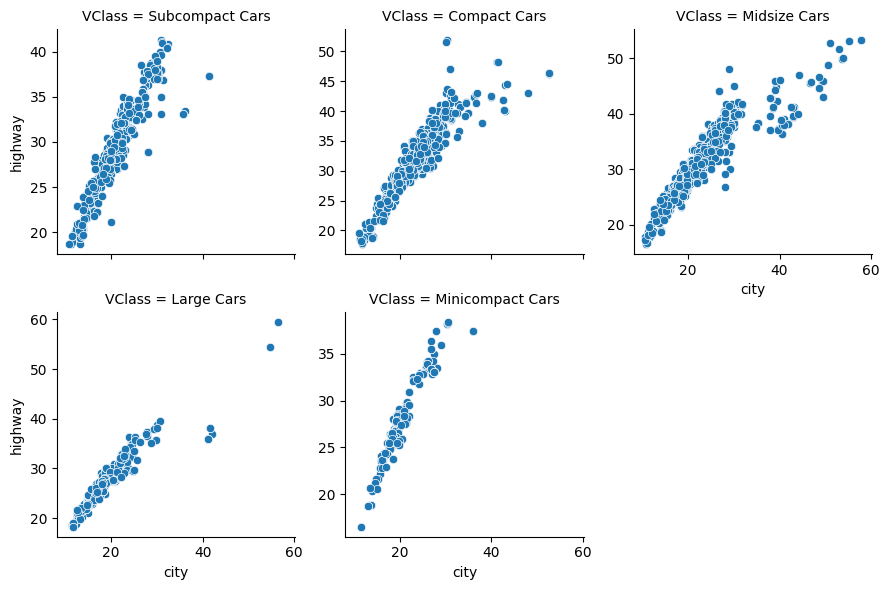

In [4]:
# YOUR CODE HERE
grid = sns.FacetGrid(data = df, col= 'VClass', sharey = False, col_wrap = 3)
grid.map(sns.scatterplot,  'city', 'highway');

### Expected Output: Exercise #1

Once you've created your chart, run the cell below to check the output from our solution. **Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.**


    Due to overplotting, I've taken a faceting approach to this task There don't seem to be any obvious
    differences in the main cluster across vehicle classes, except that the minicompact and large sedans'
    arcs are thinner than the other classes due to lower counts. The faceted plots clearly show that most
    of the high-efficiency cars are in the mid-size and compact car classes.

    


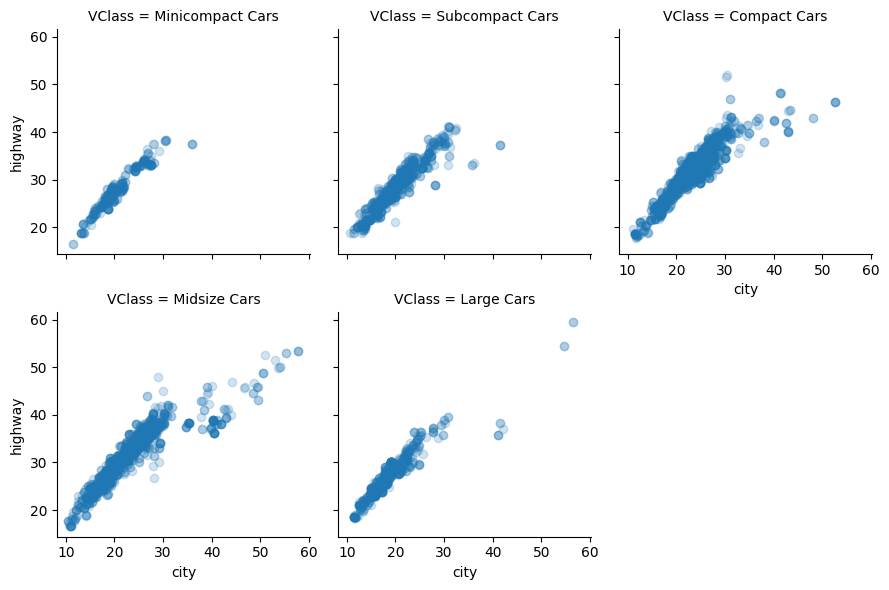

In [5]:
facetgrid_solution_1()

### Exercise 2: Pair Plot
Creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: `displ`, `co2`, `city`, `highway`, and `comb`. On the diagonal, plot a KDE instead of a histogram. Do you see any interesting relationships that weren't highlighted previously?

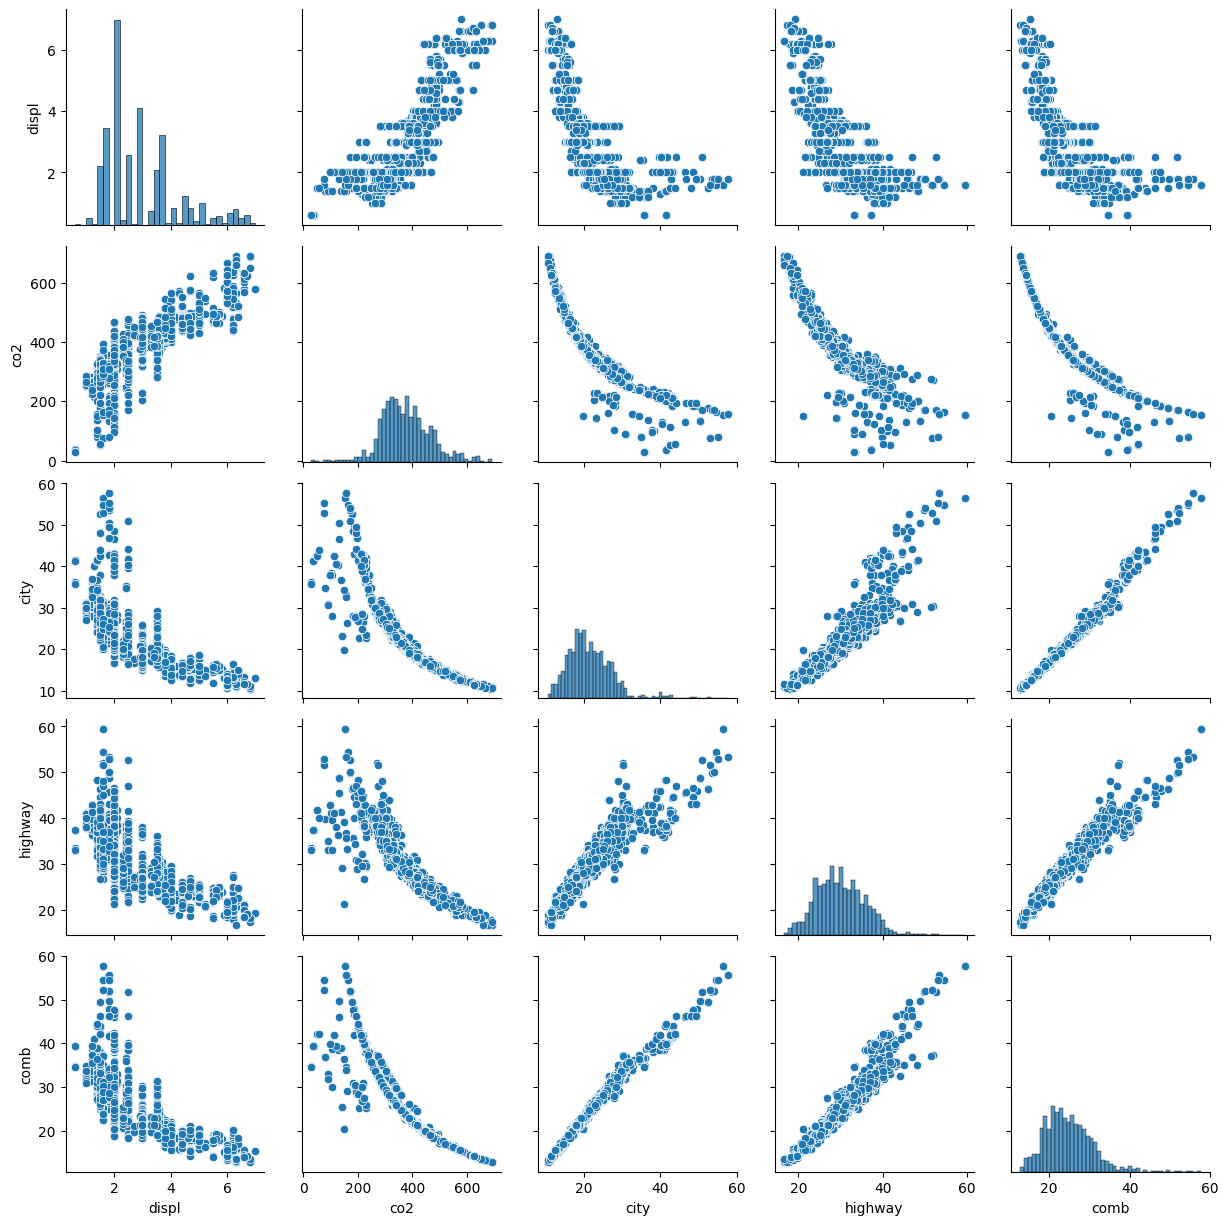

In [6]:
# YOUR CODE HERE
grid = sns.PairGrid(data = df, vars= ['displ', 'co2', 'city', 'highway', 'comb'])
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot);

### Expected Output: Exercise #2


    I set up my PairGrid to plot scatterplots off the diagonal and histograms on the diagonal. The
    intersections where 'co2' meets the fuel mileage measures are fairly interesting in how tight the
    curves are. You'll explore this more in the next task.

    


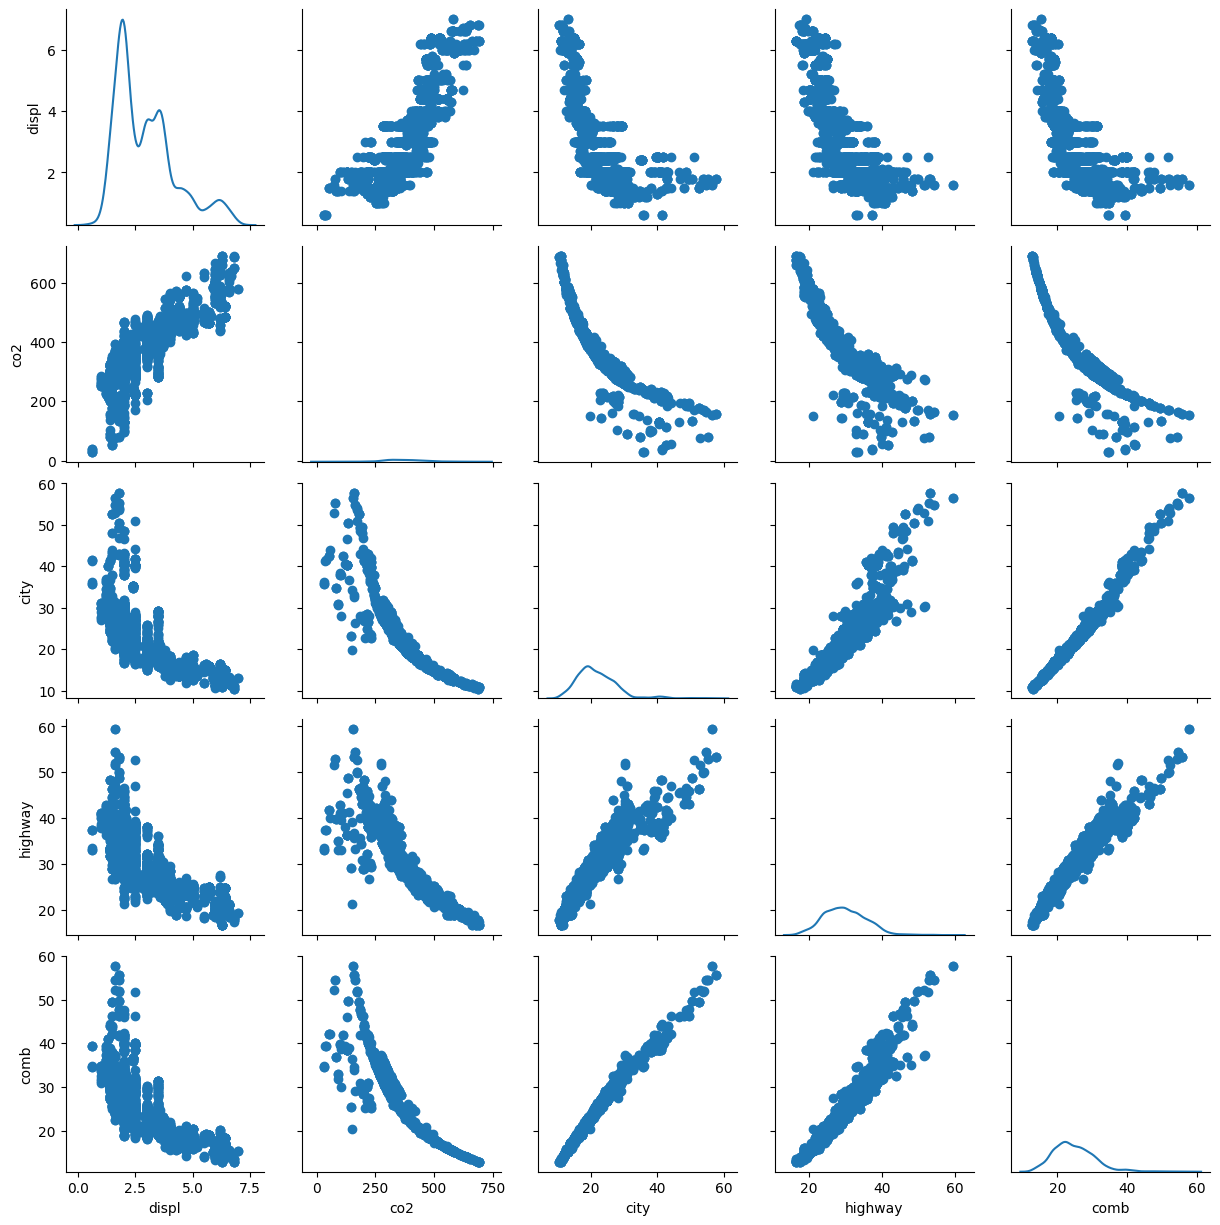

In [7]:
pairplot_solution_1()

### Exercise 3: Additional plotting
The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The `co2` variable is in units of g / mi, and the `comb` variable is in units of mi / gal.) Then, plot this new emissions variable against engine size (`displ`) and fuel type (`fuelType`). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

In [8]:
# YOUR CODE HERE
df['CO2_emmissions'] = df['co2']*df['comb']
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,CO2_emmissions
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,8826.0219
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,8802.7223
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,8868.1164
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,8865.3204
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,8891.2030


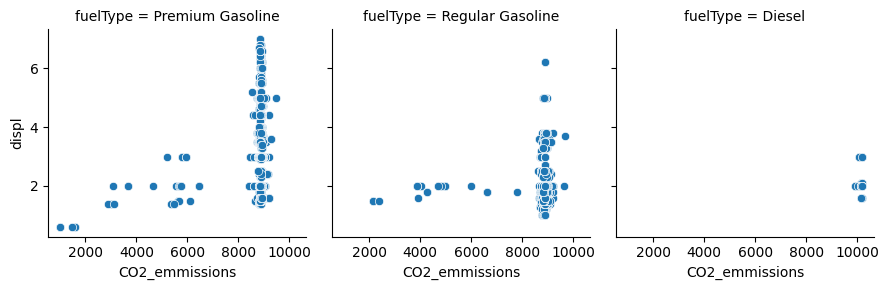

In [9]:
subset = df[df['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline', 'Diesel'])]
grid = sns.FacetGrid(data = subset, col = 'fuelType')
grid.map(sns.scatterplot,  'CO2_emmissions' ,'displ');

### Expected output: Exercise #3


    Due to the high number of data points and their high amount of overlap, I've chosen to plot the data
    in a faceted plot. You can see that engine sizes are smaller for cars that use regular gasoline
    against those that use premium gas. Most cars fall in an emissions band a bit below 9 kg CO2 per
    gallon; diesel cars are consistently higher, a little above 10 kg CO2 per gallon. This makes sense,
    since a gallon of gas gets burned no matter how efficient the process. More strikingly, there's a
    smattering of points with much smaller emissions. If you inspect these points more closely you'll see
    that they represent hybrid cars that use battery energy in addition to conventional fuel! To pull
    these mechanically out of the dataset requires more data than that which was trimmed to create it -
    and additional research to understand why these points don't fit the normal CO2 bands.

    


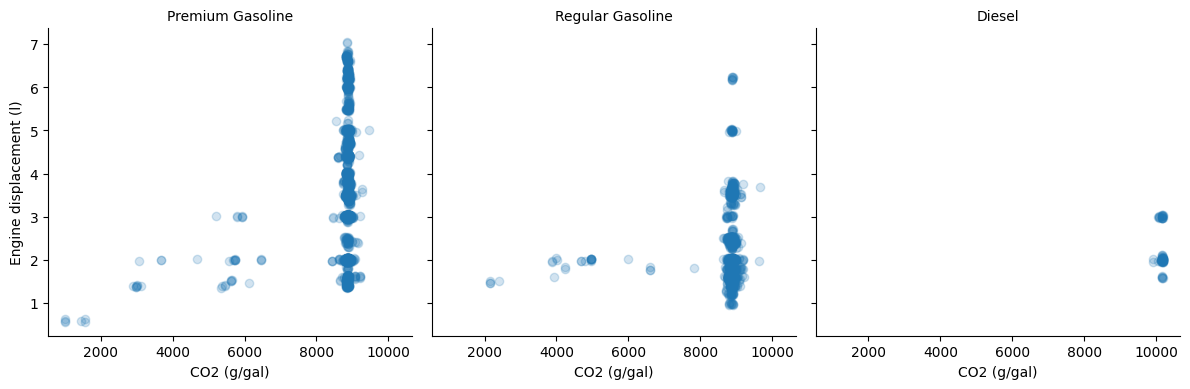

In [10]:
additionalplot_solution_1()

If you're interested in seeing the code used to generate the solution plots, you can find it in the `solution_bivariate.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!